In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [47]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
missing_values = df.isnull().sum()
per_missing = (df.isnull().sum()/len(df)) * 100
total_missing = pd.concat([missing_values, per_missing], axis= 1)
total_missing.columns=['Missing', 'Percentage']
total_missing.sort_values('Percentage', ascending=False,inplace=True)
total_missing.head(20)

,Missing,Percentage
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


In [49]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
x = df.iloc[:,[3,4]].values

In [51]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[269981.28,
 186362.95600651755,
 106348.37306211122,
 73880.64496247195,
 44454.476479679724,
 38814.850052563714,
 37227.66843573094,
 26979.894603369597,
 23533.883426353415,
 22714.447041316525]

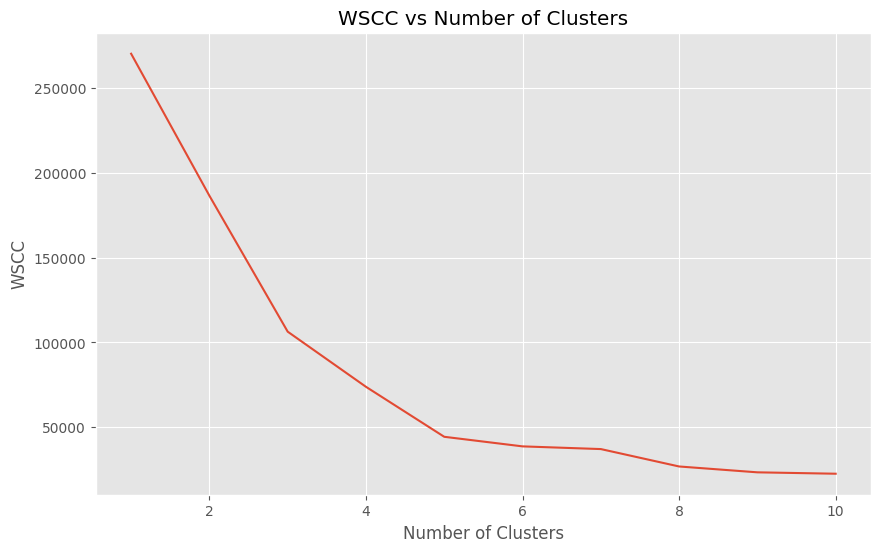

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title('WSCC vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSCC')
plt.show()

In [53]:
fig = px.line(x = range(1,11),y = wcss)
fig.show()

In [54]:
ymeans3 = KMeans(n_clusters=3)
pred3 = ymeans3.fit_predict(x)
pred3 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

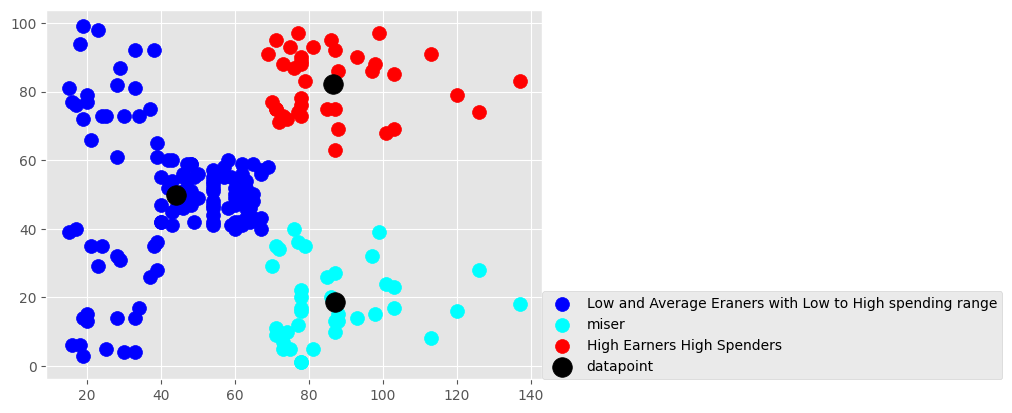

In [55]:
plt.scatter(x[pred3==0,0],x[pred3 == 0,1],c = 'blue', s=100, label = 'Low and Average Eraners with Low to High spending range')
plt.scatter(x[pred3==1,0],x[pred3 == 1,1],c = 'cyan', s=100, label = 'miser')
plt.scatter(x[pred3==2,0],x[pred3 == 2,1],c = 'red', s=100, label = 'High Earners High Spenders')
plt.scatter(ymeans3.cluster_centers_[:,0], ymeans3.cluster_centers_[:,1], s = 200, c='black', label = 'datapoint')
plt.legend(loc =[1,0])
plt.show()

In [56]:
ymeans5 = KMeans(n_clusters=5)
pred5 = ymeans5.fit_predict(x)
pred5 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

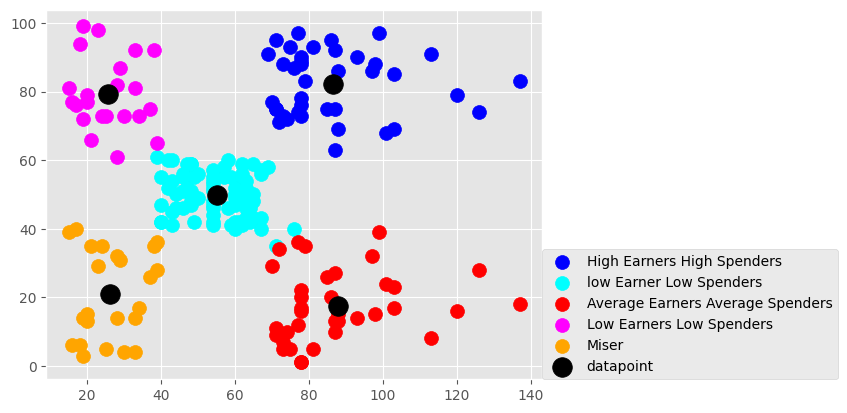

In [57]:
plt.scatter(x[pred5==0,0],x[pred5 == 0,1],c = 'blue', s=100, label =  'High Earners High Spenders')
plt.scatter(x[pred5==1,0],x[pred5 == 1,1],c = 'cyan', s=100, label = 'low Earner Low Spenders')
plt.scatter(x[pred5==2,0],x[pred5 == 2,1],c = 'red', s=100, label = 'Average Earners Average Spenders')
plt.scatter(x[pred5==3,0],x[pred5 == 3,1],c = 'magenta', s=100, label = 'Low Earners Low Spenders')
plt.scatter(x[pred5==4,0],x[pred5 == 4,1],c = 'orange', s=100, label = 'Miser')
plt.scatter(ymeans5.cluster_centers_[:,0], ymeans5.cluster_centers_[:,1], s = 200, c='black', label = 'datapoint')
plt.legend(loc =[1,0])
plt.show()